In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Color map
colors = ['maroon','coral',#'wheat',
          'gold','olivedrab',#'palegreen','teal',
          'lightslategray',#'palevioletred',
          'midnightblue','plum','olive']

cmap = plt.get_cmap('tab10')
colors = cmap.colors

sample_sizes = [20,50,100,
                 200,
                500,550,580,600,610,620,630,
                640,
                650,
                700,
                750,
                800,1000,1500,2000,3000,4000,6000,8000
]


(368, 11)
Index(['score', 'Embeddings', 'sample_size', 'train_mean_spearman',
       'train_std_spearman', 'test_mean_spearman', 'test_std_spearman',
       'train_spearman_upper_bound', 'train_spearman_lower_bound',
       'test_spearman_upper_bound', 'test_spearman_lower_bound'],
      dtype='object')
One-hot Intrinsic solubility score
[(20, 0.159), (50, 0.281), (100, 0.349), (200, 0.439), (500, 0.573), (550, 0.582), (580, 0.587), (600, 0.594), (610, 0.6), (620, 0.602), (630, 0.606), (640, 0.605), (650, 0.609), (700, 0.62), (750, 0.637), (800, 0.649), (1000, 0.688), (1500, 0.753), (2000, 0.801), (3000, 0.854), (4000, 0.882), (6000, 0.903), (8000, 0.912)]
One-hot Zsurf score
[(20, 0.129), (50, 0.236), (100, 0.289), (200, 0.352), (500, 0.455), (550, 0.469), (580, 0.474), (600, 0.48), (610, 0.481), (620, 0.483), (630, 0.486), (640, 0.487), (650, 0.49), (700, 0.493), (750, 0.505), (800, 0.516), (1000, 0.544), (1500, 0.598), (2000, 0.632), (3000, 0.689), (4000, 0.72), (6000, 0.763), (8000

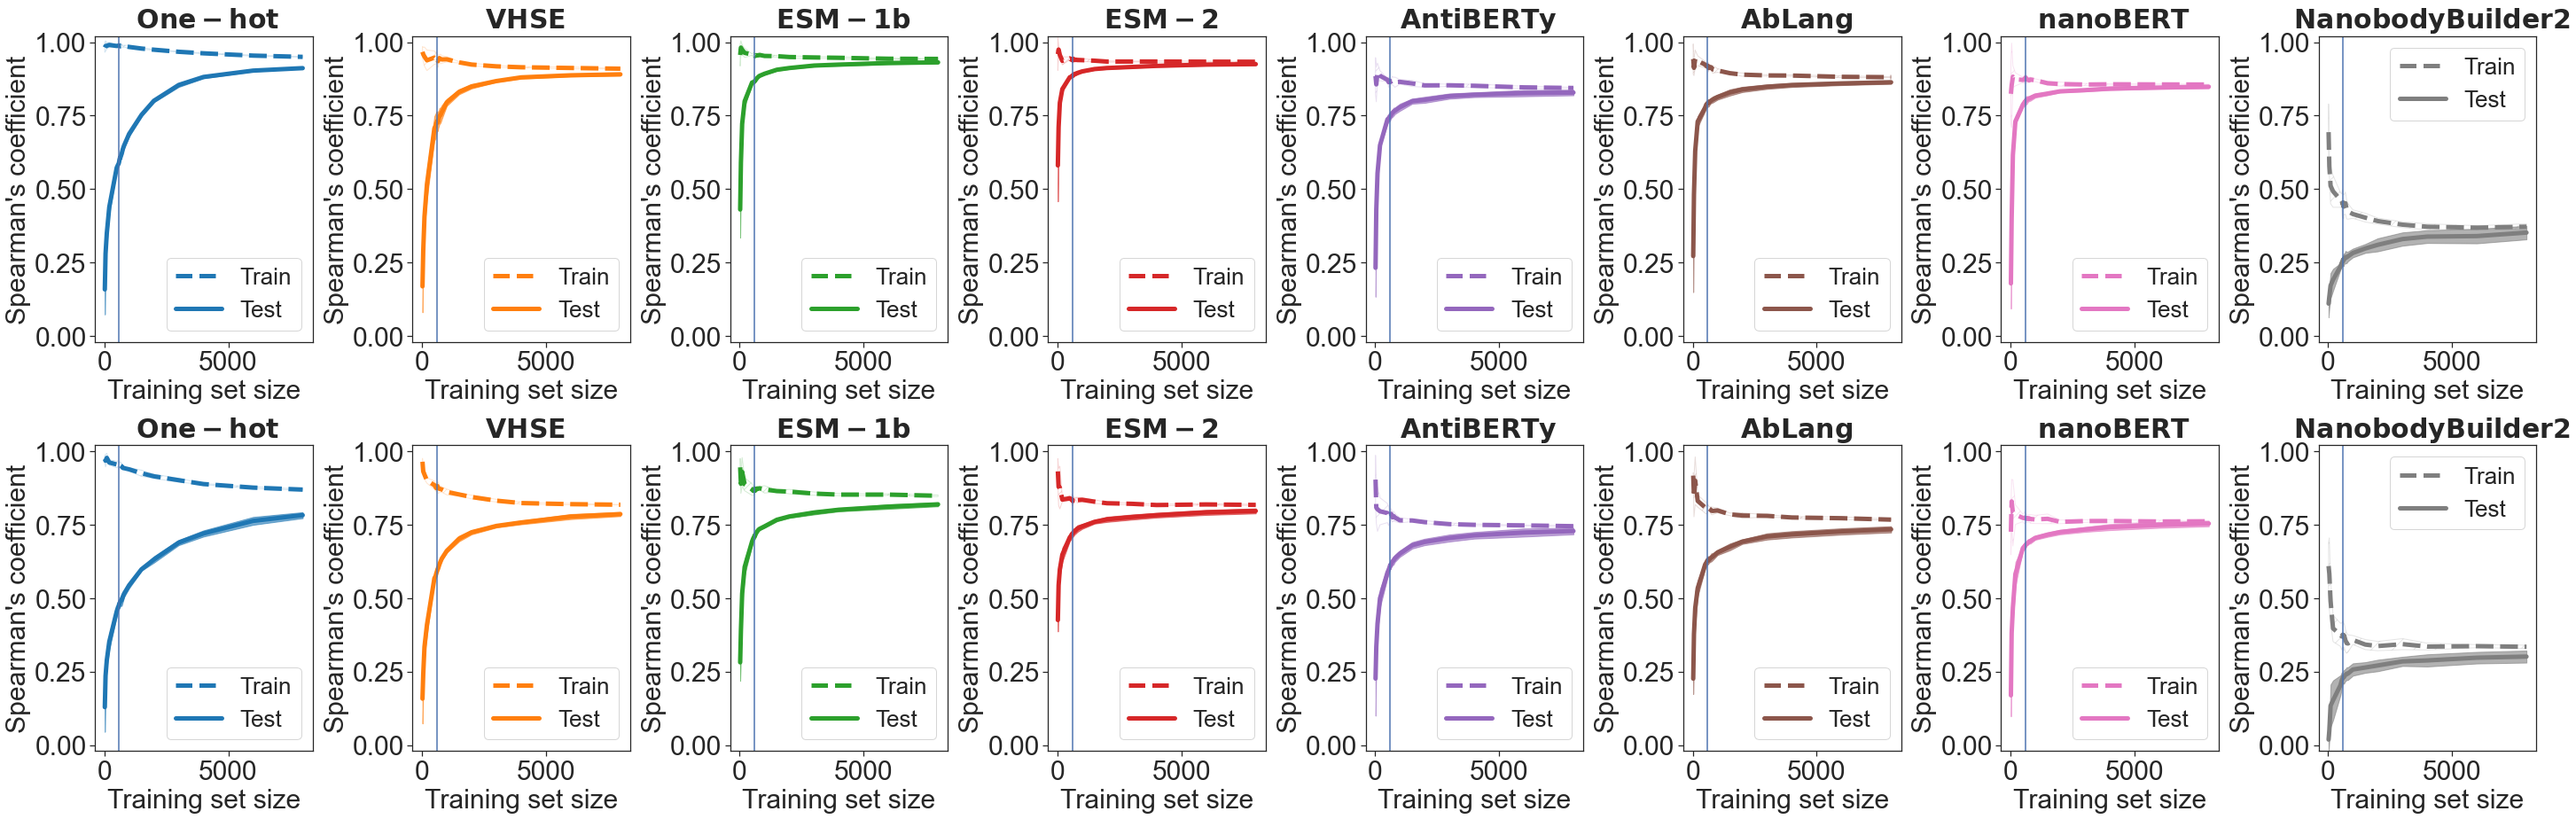

In [5]:
reg = 'ridge'
csv_path = "data/camsol_ridge.csv"
perf_df = pd.read_csv(csv_path)

# Embedding name for plotting
mapping_dict = {'onehot': 'One-hot', 
                'esm_msa1b': 'esm_msa1b', 
                'esm1b': 'ESM-1b',
                'esm2_t6': 'esm2_t6',
                'esm2_t12': 'esm2_t12',
                'esm2_t30': 'ESM-2',
                'esm2_t33': 'esm2_t33',
                'esm2_t36': 'esm2_t36',
                'antiberty': 'AntiBERTy',
                'ablang': 'AbLang',
                'nanobert': 'nanoBERT',
                'nanobuilder': 'NanobodyBuilder2',
                'vhse': 'VHSE'
                }
perf_df['embedding'] = perf_df['embedding'].map(mapping_dict)
perf_df = perf_df.replace('solubility_score','Intrinsic solubility score')
perf_df = perf_df.replace('zsurf_score','Zsurf score')

# Define embeddings for plotting
embed_methods = ['One-hot',
                 'VHSE',
                 'ESM-1b', 
                 'ESM-2',
                 'AntiBERTy',
                 'AbLang',
                 'nanoBERT',
                 'NanobodyBuilder2']

list_scores, list_embeds, list_sizes = [], [], []
list_mean_spearman_train, list_std_spearman_train = [], []
list_mean_spearman_test, list_std_spearman_test = [], []

scores = ['Intrinsic solubility score','Zsurf score']
for score in scores:
    for embed in embed_methods:
        for size in sample_sizes:
            filtered_df = perf_df[(perf_df['score']==score) & (perf_df['embedding']==embed) & (perf_df['sample_size']==size)]
            mean_spearman_train = np.mean(filtered_df['spearman_train'].values)
            std_spearman_train = np.std(filtered_df['spearman_train'].values)
            mean_spearman_test = np.mean(filtered_df['spearman_test'].values)
            std_spearman_test = np.std(filtered_df['spearman_test'].values)

            list_scores.append(score)
            list_embeds.append(embed)
            list_sizes.append(size)
            list_mean_spearman_train.append(mean_spearman_train)
            list_std_spearman_train.append(std_spearman_train)
            list_mean_spearman_test.append(mean_spearman_test)
            list_std_spearman_test.append(std_spearman_test)

df_to_plot = {'score': list_scores,
              'Embeddings': list_embeds,
              'sample_size': list_sizes,
              'train_mean_spearman': list_mean_spearman_train,
              'train_std_spearman': list_std_spearman_train,
              'test_mean_spearman': list_mean_spearman_test,
              'test_std_spearman': list_std_spearman_test}
df_to_plot = pd.DataFrame(df_to_plot)

train_spearman_upper_bound = [df_to_plot['train_mean_spearman'][i]+df_to_plot['train_std_spearman'][i] for i in range(len(df_to_plot))]
train_spearman_lower_bound = [df_to_plot['train_mean_spearman'][i]-df_to_plot['train_std_spearman'][i] for i in range(len(df_to_plot))]
df_to_plot['train_spearman_upper_bound'] = train_spearman_upper_bound
df_to_plot['train_spearman_lower_bound'] = train_spearman_lower_bound

test_spearman_upper_bound = [df_to_plot['test_mean_spearman'][i]+df_to_plot['test_std_spearman'][i] for i in range(len(df_to_plot))]
test_spearman_lower_bound = [df_to_plot['test_mean_spearman'][i]-df_to_plot['test_std_spearman'][i] for i in range(len(df_to_plot))]
df_to_plot['test_spearman_upper_bound'] = test_spearman_upper_bound
df_to_plot['test_spearman_lower_bound'] = test_spearman_lower_bound
print(df_to_plot.shape)
print(df_to_plot.columns)

sns.set_theme(style='white')
fig, axs = plt.subplots(2,len(embed_methods), figsize=(40, 13))
for j in range(len(embed_methods)):
    embed = embed_methods[j]
    df_to_plot_fil = df_to_plot[df_to_plot['Embeddings']==embed]
    
    for i in range(len(scores)):
        score = scores[i]
        score_df = df_to_plot_fil[df_to_plot_fil['score']==score]
        sample, spearmans, embeddings = [], [], []
        data_type = []
        sample.extend(score_df['sample_size'].values)
        sample.extend(score_df['sample_size'].values)
        spearmans.extend(score_df['test_mean_spearman'].values)
        spearmans.extend(score_df['train_mean_spearman'].values)
        embeddings.extend(score_df['Embeddings'].values)
        embeddings.extend(score_df['Embeddings'].values)
        data_type.extend(['test']*len(score_df['sample_size']))
        data_type.extend(['train']*len(score_df['sample_size']))
        data_df = {'sample_size':sample, 'spearman': spearmans, 'Embeddings':embeddings, 'Data': data_type}
        data_df['Data'] = [i.capitalize() for i in data_type]
        print(embed, score)
        print([(x,round(i,3)) for x,i in zip(score_df['sample_size'].values,score_df['test_mean_spearman'].values)])

        sns.lineplot(data=data_df, x='sample_size', y='spearman', style='Data', color=colors[j], linewidth = 5, ax = axs[i,j],legend=False)
        axs[i,j].plot([], [], color=colors[j], linestyle="--", linewidth=5, label="Train")
        axs[i,j].plot([], [], color=colors[j], linestyle="-", linewidth=5, label="Test")

        axs[i,j].vlines(600, ymin=-1, ymax=2)

        axs[i,j].fill_between(score_df['sample_size'].tolist(), score_df['train_spearman_upper_bound'].tolist(), score_df['train_spearman_lower_bound'].tolist(), color=colors[j], alpha=.2, hatch='/', facecolor='none')
        axs[i,j].fill_between(score_df['sample_size'].tolist(), score_df['test_spearman_upper_bound'].tolist(), score_df['test_spearman_lower_bound'].tolist(), color=colors[j], alpha=.6)
        axs[i,j].set_ylim(-0.02,1.02)
        # axs[i,j].set_xscale('log')
        title = r'$\mathbf{\ %s}$' % embed
        axs[i,j].set_title(title,fontsize=30,y=1.01)
        axs[i,j].set_xlabel('Training set size',fontsize=30)
        axs[i,j].set_ylabel("Spearman's coefficient",fontsize=30)
        if j==7:
            legend = axs[i,j].legend(loc='upper right', ncol=1, fontsize=26)
        else: legend = axs[i,j].legend(loc='lower right', ncol=1, fontsize=26)
        legend.get_title().set_fontsize('26') 
        axs[i,j].tick_params(bottom=True, left=True, labelsize=30)

fig.tight_layout()
plt.savefig('figures/figureS1.png', dpi=800, bbox_inches='tight')	
plt.show()


